# Contour Plots, 3D Plots, Optimisation

We will study contour plots and 3D plots for functions of two variables. We will also look at simple examples of unconstrained and constrained optimisation of functions of two variables.

## Import


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Contour Plots, 3D Plots, Optimisation

We will look at plotting contours of surfaces, surface plots and optimising functions of two variables.

## Contour

Draw contours of the function:

$$
f(x, y) = x^2 + y^2
$$

(-2.0, 2.0, -2.0, 2.0)

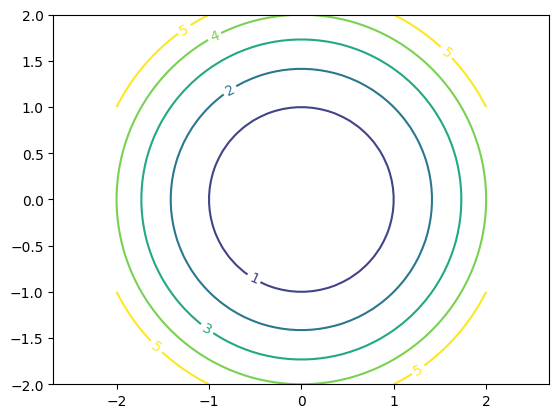

In [76]:
x_ = np.linspace(-2, 2)
y_ = np.linspace(-2, 2)
x, y = np.meshgrid(x_, y_)
z = x ** 2 + y ** 2
cs = plt.contour(x, y, z,
                levels = [0, 1, 2, 3, 4, 5] )
plt.clabel(cs)
plt.axis('equal')

## 3D surface plot

Plot the following surface:

$$
f(x, y) = \exp \left[ \cfrac{-(x + 2)^2 - (y - 1)^2}{6} \right]
$$

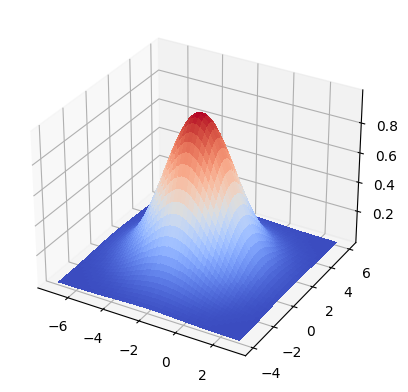

In [43]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw = {'projection': '3d'})
x_ = np.linspace(-7, 3)
y_ = np.linspace(-4, 6)
x, y = np.meshgrid(x_, y_)
z = np.exp(-((x + 2) ** 2 + (y - 1) ** 2) / 6)
ax.plot_surface(x, y, z, cmap = cm.coolwarm,
                antialiased = False);

## Unconstrained Optimisation

Let us now try to find the maximum value of the above function. This is a simple, unconstrained optimisation problem. We will use `SciPy`'s optimisation routine for this.

$$
\max \limits_{x, y} \quad  \exp \left[ \cfrac{-(x + 2)^2 - (y - 1)^2}{6} \right]
$$

SciPy's optimization routines are in the form of minimizers, so we will negate the objective function and minimze it.

In [44]:
from scipy import optimize

def f(x):
    return -np.exp(-((x[0] + 2) ** 2 + (x[1] - 1) ** 2) / 6)

res = optimize.minimize(f, np.zeros(2))
res.x

array([-1.99999576,  0.99999789])

We see that the value is close to $(-2, 1)$, which is indeed the maximum in this case.

## Constrained Optimisation

Let us move to the slightly more complex setup of a constraind optimisation problem.

$$
\max \limits_{x, y} \quad 1 - x^2 - y^2
$$

subject to:

$$
x + y \geq 1
$$

In [52]:
from scipy import optimize
from scipy.optimize import LinearConstraint

# objective
def f(x):
    return x[0] ** 2 + x[1] ** 2 - 1

# optimize
res = optimize.minimize(f, np.zeros(2),
                        constraints = LinearConstraint(
                        A = np.array([1, 1]),
                        lb = 1))
res.x

array([0.5, 0.5])

### Verify

Let us plot the contours of the objective function, the constraint and the optimum obtained.

(-2.0, 2.0)

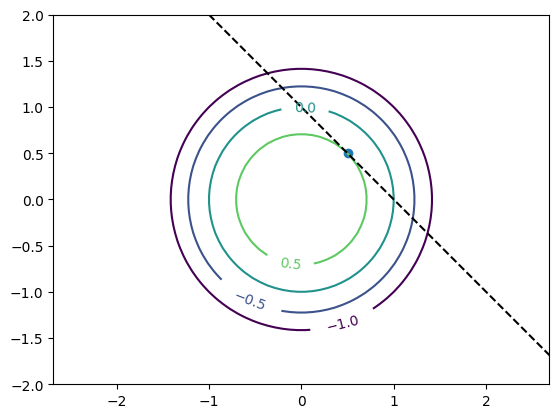

In [74]:
# contours of the objective
x_ = np.linspace(-4, 4, 100)
y_ = np.linspace(-4, 4, 100)
x, y = np.meshgrid(x_, y_)
cs = plt.contour(x, y, -f([x, y]), levels = [-1, -0.5, 0, 0.5, 1])
plt.clabel(cs)
# constraints
plt.plot(x_, 1 - x_, linestyle = '--', color = 'black')
# optimum
plt.scatter(0.5, 0.5)
# adjust plot
plt.axis('equal');
plt.xlim(-2, 2)
plt.ylim(-2, 2)

We see that the maximum is indeed at $(0.5, 0.5)$ as obtained using SciPy.